In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [150]:
df = pd.read_csv("B-TREASURY : Bualuang Treasury Fund.csv")
df

,Unnamed: 0,date,NAV,NavperUnit,sellingPrice,redemptionPrice,change,FundName
0,0,2023-02-13,3.671982e+10,11.2968,11.2969,11.2968,0.0008,B-TREASURY : Bualuang Treasury Fund
1,1,2023-02-10,3.676600e+10,11.2960,11.2961,11.2960,0.0003,B-TREASURY : Bualuang Treasury Fund
2,2,2023-02-09,3.684215e+10,11.2957,11.2958,11.2957,0.0003,B-TREASURY : Bualuang Treasury Fund
3,3,2023-02-08,3.702327e+10,11.2954,11.2955,11.2954,0.0004,B-TREASURY : Bualuang Treasury Fund
4,4,2023-02-07,3.701188e+10,11.2950,11.2951,11.2950,0.0000,B-TREASURY : Bualuang Treasury Fund
...,...,...,...,...,...,...,...,...
1696,1696,2016-02-23,3.572191e+09,10.7063,10.7064,10.7063,0.0015,B-TREASURY : Bualuang Treasury Fund
1697,1697,2016-02-19,3.596358e+09,10.7048,10.7049,10.7048,0.0003,B-TREASURY : Bualuang Treasury Fund
1698,1698,2016-02-18,3.651889e+09,10.7045,10.7046,10.7045,0.0003,B-TREASURY : Bualuang Treasury Fund
1699,1699,2016-02-17,3.638549e+09,10.7042,10.7043,10.7042,0.0003,B-TREASURY : Bualuang Treasury Fund


In [151]:
df.date = pd.to_datetime(df.date)

Text(0.5, 1.0, 'NAV')

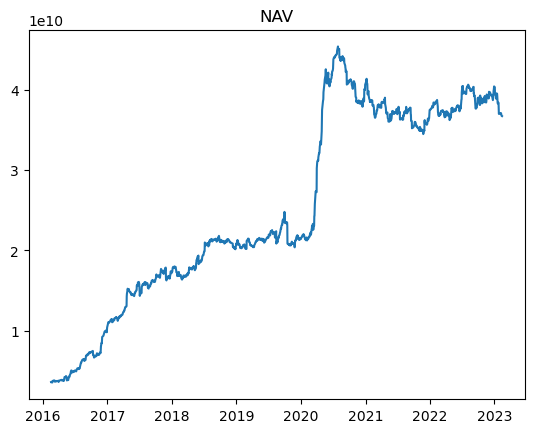

In [297]:
plt.plot(df.date, df.NAV)
plt.title('NAV')

Text(0.5, 1.0, 'Selling price')

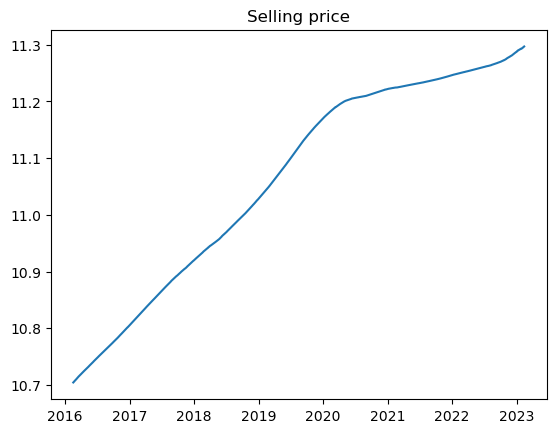

In [303]:
plt.plot(df.date, df.sellingPrice)
plt.title("Selling price")

In [153]:
 df = df.sort_values('date')

Text(0.5, 1.0, 'Change')

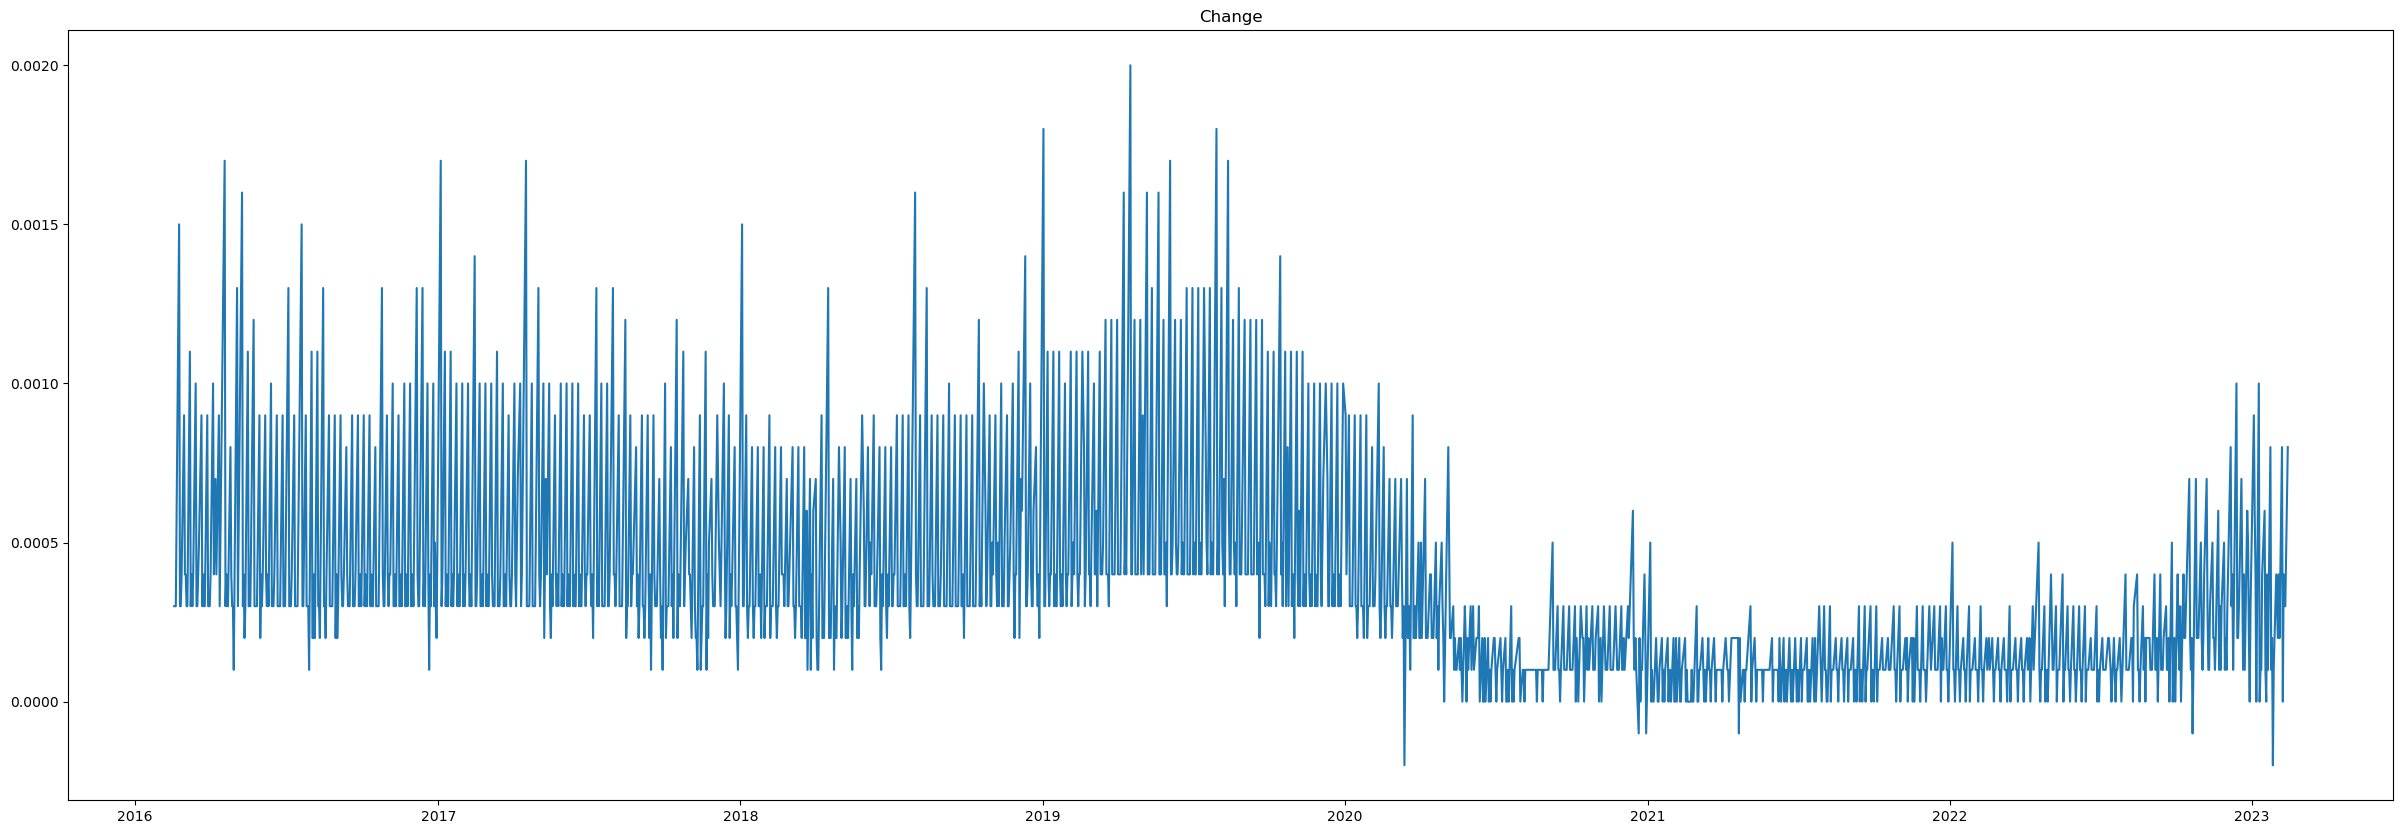

In [298]:
plt.figure(figsize=(30,10))
plt.plot(df.date, df['change'])
plt.title("Change")

Text(0.5, 1.0, 'Change and Return')

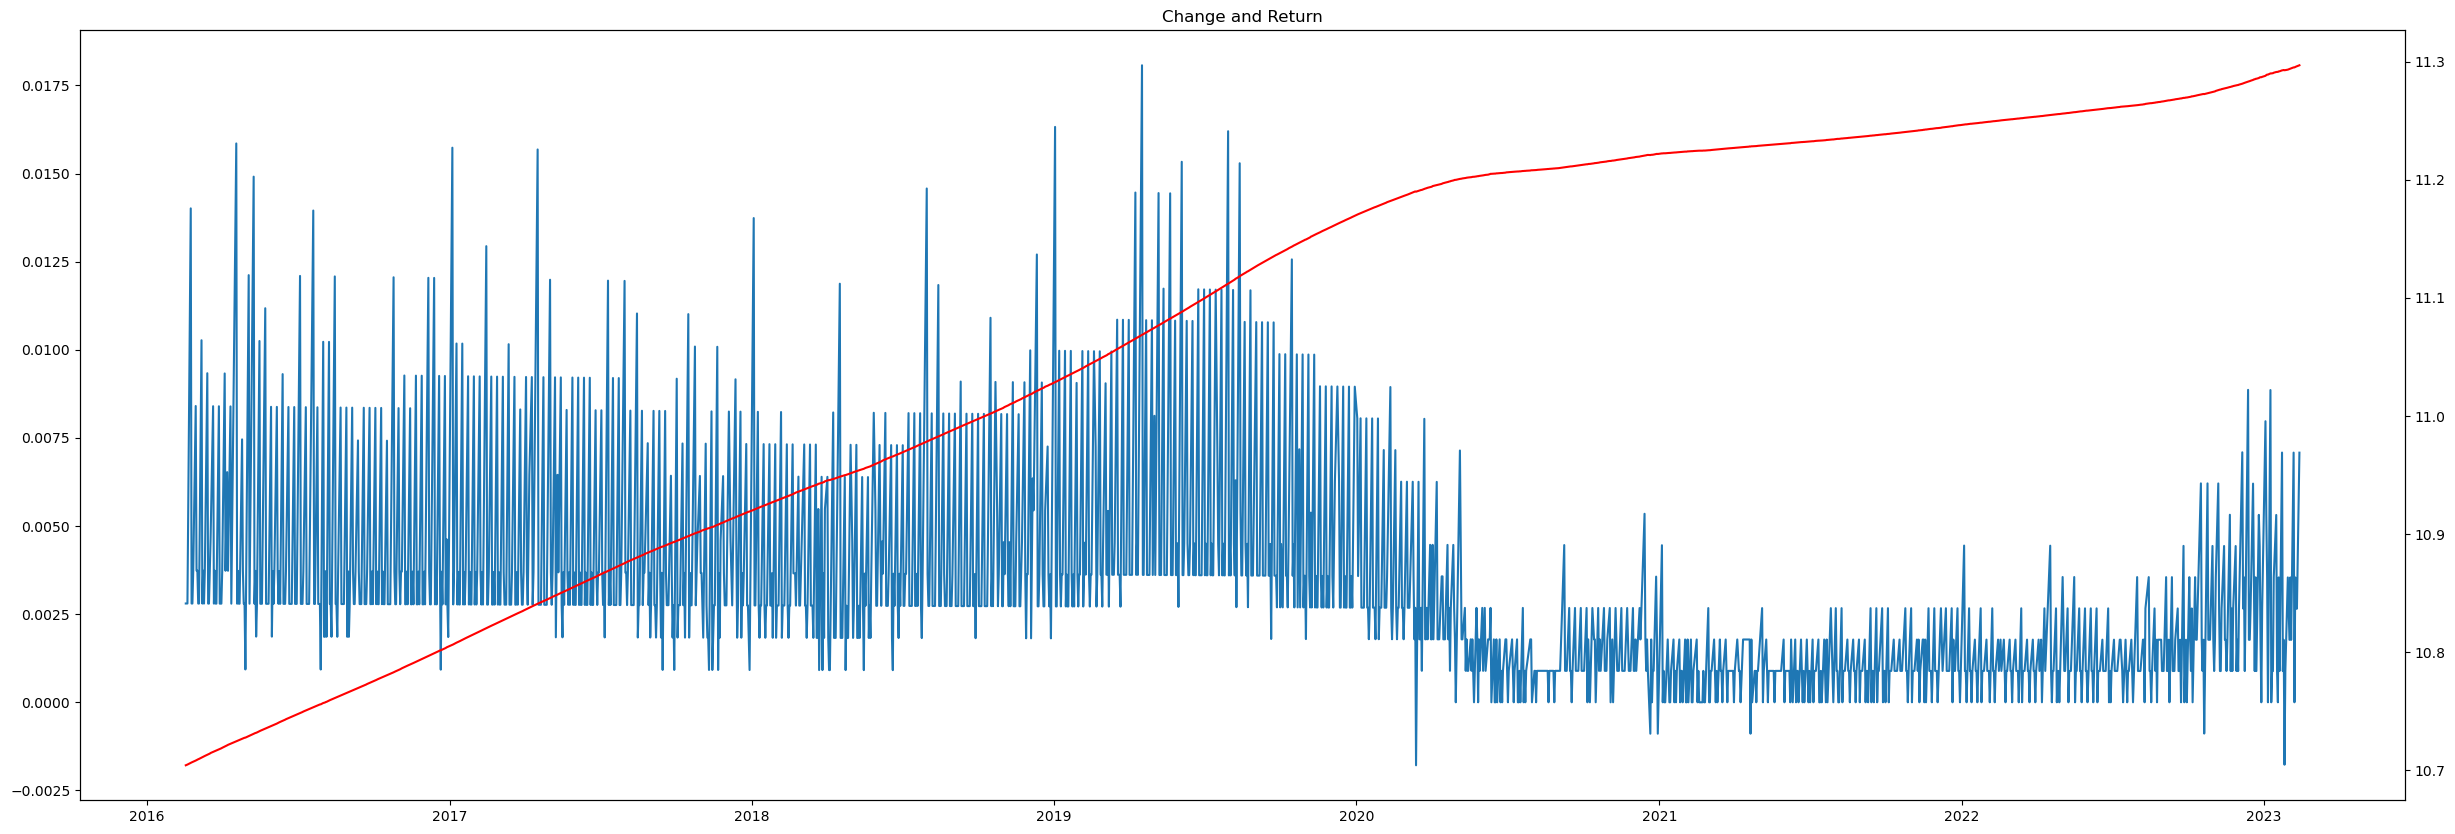

In [302]:

fig, ax1 = plt.subplots(figsize=(30,10))

ax1.plot(df.date, df['pct_change'])
ax2 = ax1.twinx()
ax2.plot(df.date, df.sellingPrice, color='red')
plt.title('Change and Return')

In [159]:
df = df.dropna(subset='pct_change')

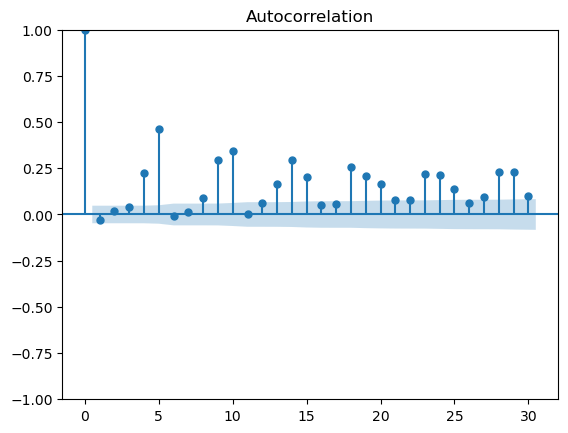

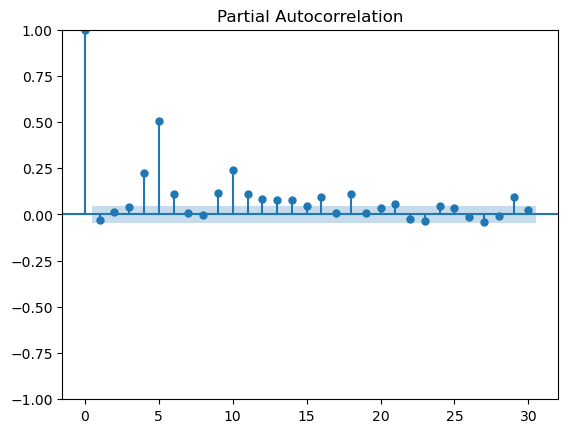

In [160]:
acf = plot_acf(df['pct_change']**2, lags=30)
pacf = plot_pacf(df['pct_change']**2, lags=30)

In [306]:
model = arch_model(df['change'], mean='zero', vol = 'GARCH', p=4, q=4)

In [307]:
model_fit = model.fit(disp='off')
model_fit.summary()

/Users/vitvaraaravithya/miniforge3/envs/DA/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 change   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                11006.9
Distribution:                  Normal   AIC:                          -21995.8
Method:            Maximum Likelihood   BIC:                          -21946.9
                                        No. Observations:                 1700
Date:                Wed, Apr 12 2023   Df Residuals:                     1700
Time:                        12:29:39   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.3978e-09  8.632e-10      5.095  3.496e-07 [2.706e-09,6.090e-09]
alpha[1]       0.0500  6.251e-03      7.999  1.253e-15 [3.775e-02,6.225e-02]
alpha[2]       0.0500  3.964e-03     12.612  1.810e-36 [4.223e-02,5.777e-02]
alpha[3]       0.0500  3.755e-03     13.315  1.884e-40 [4.264e-02,5.736e-02]
alpha[4]       0.0500  3.652e-03     13.693  1.121e-42 [4.284e-02,5.716e-02]
beta[1]        0.1950  4.052e-02      4.813  1.490e-06     [  0.116,  0.274]
beta[2]        0.1950  3.523e-02      5.534  3.123e-08     [  0.126,  0.264]
beta[3]        0.1950  3.258e-02      5.985  2.161e-09     [  0.131,  0.259]
beta[4]        0.1950  2.711e-02      7.193  6.345e-13     [  0.142,  0.248]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [310]:
predict_period = 10
test_size = 30*12
rolling_predictions = []

for i in range(0, test_size,predict_period):
    train = df['change'][:-(test_size-i)]
    model = arch_model(train, mean='zero', vol = 'GARCH', p=4, q=4)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=predict_period)
    rolling_predictions += np.sqrt(pred.variance.values[-1,:]).tolist()

/Users/vitvaraaravithya/miniforge3/envs/DA/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/vitvaraaravithya/miniforge3/envs/DA/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/vitvaraaravithya/miniforge3/envs/DA/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/vitvaraaravithya/miniforge3/envs/DA/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints inc

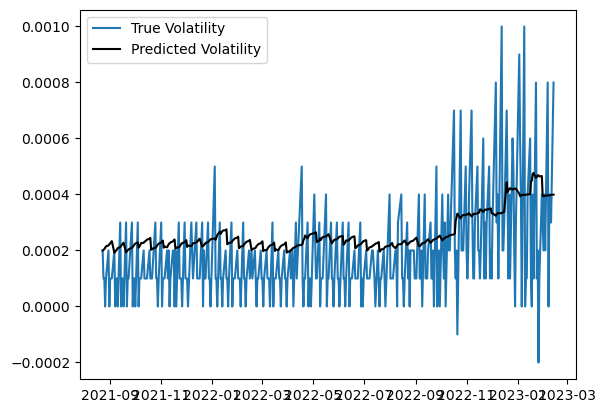

In [311]:
rolling_predictions = pd.Series(rolling_predictions, index=df['change'].index[-test_size:])
true, = plt.plot(df.date[-test_size:], (df['change'])[-test_size:])
preds, = plt.plot(df.date[-test_size:],rolling_predictions, color='black')
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=10)

2.922554936552152e-08